# 비만 AI 솔루션

### 1.문제정의

세계보건기구에 따르면, 세계 비만은 1975년 이래로 거의 3배가
되었다. 
2016년, 18세 이상의 성인 19억 명 이상이 과체중이었다. 이 중
6억 5천만 명 이상이 비만이었다.
세계 인구의 대부분 중 과체중과 비만인 사람이 저체중인 사람보다 더 높은 사망률을 보인다.

#### 비만이란?
 -  비만은 조기 사망의 주요 위험 요소 중 하나입니다.
 -  비만이 되면 다음과 같은 잠재적으로 심각한 건강 상태가 발생할 위험이 높아집니다.
 -  제2형 당뇨병. 고혈압
 -  관상 동맥 심장 질환 및 뇌졸중을 유발할 수 있는 고콜레스테롤 및 죽상 동맥 경화증(지방 침착물이 동맥을 좁히는 경우)
 -  유방암 및 대장암과 같은 일부 유형의 암이 발병할 수 있다.


#### 간단한 예방 단계
 -  신체 활동 - 대부분의 사람들은 앉거나 자는 동안에도 신체가 약간의 칼로리를 소모하지만, 대부분의 사람들은 활동량이 많을수록 신체에서 더 많은 칼로리를 소모합니다.
 - 체중 감량 약물(의사가 처방한 경우에만)
 - 식이 변화 - 일부 유형의 음식은 체중 증가로 이어질 가능성이 더 큽니다.

#### 이번 캡스톤에서는 AI를 통해 비만을 위한  이상적인 해결책을 찾으려고 한다.
운동 부분에 초점을 맞춰 AI를 사용하여 추적할 것이다. 인간 활동 인식 센서 데이터를 불러와 '서기(Standing)', '앉기(Sitting)', '눕기(Laying)', '걷기(Walking)', '아래층으로 걷기(Walking downstairs)', '위층으로 걷기(Walking upstairs)' 인 데이터를 분석하여 활동을 추적하는 모델을 만들어 볼 것 이다.

In [1]:
# 라이브러리 가져오기

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import homogeneity_score, completeness_score, \
v_measure_score, adjusted_rand_score, adjusted_mutual_info_score, silhouette_score
%matplotlib inline
np.random.seed(123)

### 2. Data 획득

In [2]:
#pandas read_csv 이용하여 train.csv 데이터를 dataframe 형태로 불러온다.

df = pd.read_csv("train.csv")
df

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.01960,-0.1100,-0.9970,-0.9670,-0.983,-0.997,-0.9660,...,0.1460,-0.2170,-0.5640,-0.2130,-0.2310,0.0146,-0.1900,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.01270,-0.1030,-0.9950,-0.9730,-0.985,-0.996,-0.9740,...,0.1210,0.3490,0.0577,0.0807,0.5960,-0.4760,0.1160,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.01470,-0.1070,-0.9990,-0.9910,-0.993,-0.999,-0.9910,...,0.7400,-0.5640,-0.7660,0.1060,-0.0903,-0.1320,0.4990,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.02710,-0.0617,-0.9890,-0.8170,-0.902,-0.989,-0.7940,...,0.1310,0.2080,-0.0681,0.0623,-0.0587,0.0312,-0.2690,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.01700,-0.1110,-0.9980,-0.9910,-0.998,-0.998,-0.9890,...,0.6670,-0.9420,-0.9660,0.2450,0.1030,0.0661,-0.4120,-0.761,0.263,0.0296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3604,10277,WALKING_UPSTAIRS,0.357,-0.04460,-0.1300,-0.3140,-0.0556,-0.173,-0.386,-0.0575,...,0.0168,-0.1630,-0.5930,-0.7110,-0.0612,-0.7060,0.0646,-0.660,0.274,0.1760
3605,10278,WALKING_UPSTAIRS,0.344,0.00479,-0.1220,-0.3200,-0.0667,-0.182,-0.380,-0.0710,...,-0.0292,0.1810,-0.2500,-0.4030,-0.7060,0.7390,0.8710,-0.653,0.278,0.1800
3606,10279,WALKING_UPSTAIRS,0.284,-0.00796,-0.1190,-0.3090,-0.0804,-0.211,-0.369,-0.0971,...,-0.1100,0.0245,-0.3930,-0.0761,-0.2390,0.9600,0.0866,-0.657,0.272,0.1830
3607,10280,WALKING_UPSTAIRS,0.207,0.02460,-0.1040,-0.3650,-0.1690,-0.216,-0.449,-0.1860,...,-0.2140,-0.3520,-0.7340,0.5350,-0.2570,0.9270,-0.0843,-0.657,0.267,0.1880


In [3]:
# 5개의 행을 확인합니다. head()를 사용합니다. head() 안에 숫자를 넣을 수 있습니다. 
df.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


### 3. Data 탐색

In [4]:
#dataframe의 정보를 요약http://localhost:8888/notebooks/Downloads/%EC%BA%A1%EC%8A%A4%ED%86%A4%201%20%ED%95%9C%EA%B0%80%ED%9D%AC.ipynb#3.-Data-%ED%83%90%EC%83%89해서 출력한다.
df.info()  #dataframe의 정보
df.describe() #dataframe의 수치 정보 요약하여 출력(평균, 표준편차 같은것)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Columns: 563 entries, rn to angle.Z.gravityMean
dtypes: float64(561), int64(1), object(1)
memory usage: 15.5+ MB


,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
count,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,...,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
mean,5152.430590,0.274544,-0.017415,-0.109195,-0.608457,-0.506265,-0.614482,-0.634634,-0.521660,-0.616047,...,0.128804,-0.300815,-0.619400,0.007561,0.009484,0.029185,-0.010632,-0.496977,0.060040,-0.050202
std,2975.767839,0.063589,0.042589,0.056218,0.439157,0.501627,0.399514,0.413194,0.485282,0.394932,...,0.240278,0.317963,0.308303,0.332249,0.448971,0.613615,0.490830,0.509336,0.311308,0.263935
min,7.000000,-0.521000,-1.000000,-0.926000,-1.000000,-0.999000,-1.000000,-1.000000,-0.999000,-1.000000,...,-0.786000,-0.968000,-0.995000,-0.969000,-0.997000,-1.000000,-0.993000,-0.999000,-1.000000,-0.971000
25%,2570.000000,0.262000,-0.025200,-0.122000,-0.992000,-0.976000,-0.979000,-0.993000,-0.976000,-0.978000,...,-0.015800,-0.533000,-0.836000,-0.118000,-0.281000,-0.478000,-0.398000,-0.816000,-0.015600,-0.122000
50%,5158.000000,0.277000,-0.017200,-0.109000,-0.939000,-0.812000,-0.844000,-0.946000,-0.816000,-0.837000,...,0.132000,-0.341000,-0.706000,0.007740,0.009830,0.029600,-0.013400,-0.716000,0.183000,-0.005260
75%,7727.000000,0.287000,-0.011000,-0.098000,-0.254000,-0.051700,-0.283000,-0.306000,-0.084500,-0.288000,...,0.290000,-0.118000,-0.501000,0.142000,0.309000,0.554000,0.374000,-0.522000,0.252000,0.104000
max,10281.000000,0.693000,1.000000,1.000000,1.000000,0.980000,1.000000,1.000000,0.988000,1.000000,...,0.871000,0.990000,0.957000,0.981000,0.997000,0.999000,0.996000,0.977000,1.000000,0.998000


In [5]:
#몇 행, 몇 열로 구성되어 있는지 알아보기
df.shape

(3609, 563)

### 데이터 정제
#### activity 레이블 불균형 확인하기

In [6]:
df['activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [7]:
df['activity'].value_counts()

LAYING                681
STANDING              668
SITTING               623
WALKING               603
WALKING_UPSTAIRS      541
WALKING_DOWNSTAIRS    493
Name: activity, dtype: int64

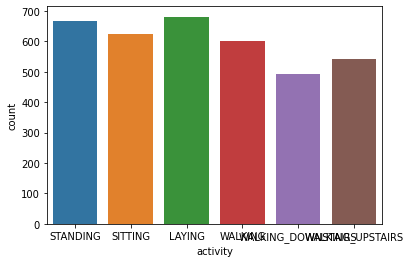

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='activity', data=df)
plt.show()

In [9]:
df.isnull().sum()

rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64

In [10]:
df = df.dropna()
df.isnull().sum()

rn                                     0
activity                               0
tBodyAcc.mean.X                        0
tBodyAcc.mean.Y                        0
tBodyAcc.mean.Z                        0
                                      ..
angle.tBodyGyroMean.gravityMean        0
angle.tBodyGyroJerkMean.gravityMean    0
angle.X.gravityMean                    0
angle.Y.gravityMean                    0
angle.Z.gravityMean                    0
Length: 563, dtype: int64

In [11]:
df.shape

(3609, 563)

### 데이터 전처리

In [12]:
df = df.drop(['rn'], axis=1)
df.head()

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,-0.983,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,-0.985,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,-0.992,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,-0.888,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,-0.997,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


In [13]:
# Object 컬럼명 수집

cal_cols = df.select_dtypes('object').columns.values
cal_cols

array(['activity'], dtype=object)

In [14]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성한 후 fit()과 transfrom()메서드로 label 인코딩 수행


encoder = LabelEncoder()
encoder.fit(df['activity'])
labels = encoder.transform(df['activity'])

print('인코딩 변환값 :', labels)

인코딩 변환값 : [2 2 2 ... 5 5 4]


In [15]:
print('인코딩 클래스 :', encoder.classes_)

인코딩 클래스 : ['LAYING' 'SITTING' 'STANDING' 'WALKING' 'WALKING_DOWNSTAIRS'
 'WALKING_UPSTAIRS']


In [16]:
print(df.columns)

Index(['activity', 'tBodyAcc.mean.X', 'tBodyAcc.mean.Y', 'tBodyAcc.mean.Z',
       'tBodyAcc.std.X', 'tBodyAcc.std.Y', 'tBodyAcc.std.Z', 'tBodyAcc.mad.X',
       'tBodyAcc.mad.Y', 'tBodyAcc.mad.Z',
       ...
       'fBodyBodyGyroJerkMag.meanFreq', 'fBodyBodyGyroJerkMag.skewness',
       'fBodyBodyGyroJerkMag.kurtosis', 'angle.tBodyAccMean.gravity',
       'angle.tBodyAccJerkMean.gravityMean', 'angle.tBodyGyroMean.gravityMean',
       'angle.tBodyGyroJerkMean.gravityMean', 'angle.X.gravityMean',
       'angle.Y.gravityMean', 'angle.Z.gravityMean'],
      dtype='object', length=562)


### Train, Test 데이터셋 분할

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = df.drop(columns = ['activity'], axis =1)
y = df['activity']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [20]:
# sklearn.preprocessing의 StandardScaler를 사용하여 데이터를 표준화한다.

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 4. 모델링 

#### 기본 분류 모델 학습 - KNN 알고리즘

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
    
# KNeighborsClassifier 초기화
KNN = KNeighborsClassifier()

# x 및 y 값을 사용하여 KNN을 훈련시킵니다. 이것은 .fit 메소드를 통해 수행됩니다.
knn = KNN.fit(X_train, y_train)

# your code here
y_pred = knn.predict(X_test)

# score 함수로 Mean accuracy 확인하기 

score = knn.score(X_test,y_test)
print("score: ", score*100)

# classification_report 함수로 모델 평가하기
print(classification_report(y_test, y_pred))

score:  93.90919158361018
                    precision    recall  f1-score   support

            LAYING       0.99      0.96      0.98       191
           SITTING       0.91      0.80      0.85       147
          STANDING       0.85      0.96      0.90       179
           WALKING       0.97      1.00      0.98       120
WALKING_DOWNSTAIRS       0.98      0.94      0.96       130
  WALKING_UPSTAIRS       0.96      0.99      0.97       136

          accuracy                           0.94       903
         macro avg       0.94      0.94      0.94       903
      weighted avg       0.94      0.94      0.94       903



<AxesSubplot: xlabel='y_pred', ylabel='y_test'>

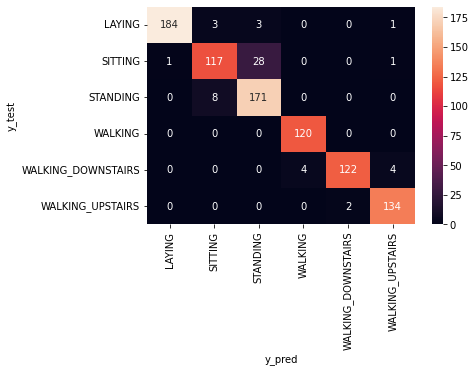

In [22]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame()

# 데이터 프레임 내에서 새 열 만들기
df['y_test'] = y_test
df['y_pred'] = y_pred

# pd.crosstab을 사용하여 실제 및 예측된 클래스의 빈도 계산
freq = pd.crosstab(df.y_test,df.y_pred)

# sns.heatmap을 사용하여 히트맵 그리기
sns.heatmap(freq,annot=True,fmt="d")

#### 랜덤 포레스트 분류기 적용하기

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state = 1)

rfc.fit(X_train, y_train)

y_pred4 = rfc.predict(X_test)
# score 함수로 Mean accuracy 확인하기 

score = rfc.score(X_test,y_test)
print(score*100)

# classification_report 함수로 모델 평가하기
print(classification_report(y_test, y_pred))

97.2314507198228
                    precision    recall  f1-score   support

            LAYING       0.99      0.96      0.98       191
           SITTING       0.91      0.80      0.85       147
          STANDING       0.85      0.96      0.90       179
           WALKING       0.97      1.00      0.98       120
WALKING_DOWNSTAIRS       0.98      0.94      0.96       130
  WALKING_UPSTAIRS       0.96      0.99      0.97       136

          accuracy                           0.94       903
         macro avg       0.94      0.94      0.94       903
      weighted avg       0.94      0.94      0.94       903



<AxesSubplot: xlabel='y_pred', ylabel='y_test'>

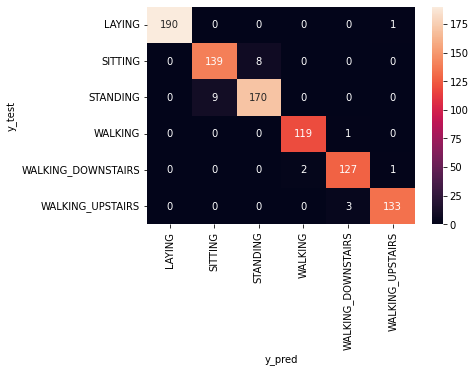

In [24]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame()

# 데이터 프레임 내에서 새 열 만들기
df['y_test'] = y_test
df['y_pred'] = y_pred4

# pd.crosstab을 사용하여 실제 및 예측된 클래스의 빈도 계산
freq = pd.crosstab(df.y_test,df.y_pred)

# sns.heatmap을 사용하여 히트맵 그리기
sns.heatmap(freq,annot=True,fmt="d")

#### 의사 결정 트리 분류기 적용하기

In [25]:
from sklearn.tree import DecisionTreeClassifier


dtc = DecisionTreeClassifier() 
dtc.fit(X_train, y_train)
y_pred1 = dtc.predict(X_test)


score1 = dtc.score(X_test,y_test)
print(score1*100)
print(classification_report(y_test, y_pred1))

92.58028792912513
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       191
           SITTING       0.88      0.90      0.89       147
          STANDING       0.92      0.91      0.91       179
           WALKING       0.88      0.94      0.91       120
WALKING_DOWNSTAIRS       0.95      0.88      0.92       130
  WALKING_UPSTAIRS       0.90      0.90      0.90       136

          accuracy                           0.93       903
         macro avg       0.92      0.92      0.92       903
      weighted avg       0.93      0.93      0.93       903



#### 로지스틱 회귀 분류기 적용하기

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)
y_pred2 = lr.predict(X_test)

score2 = lr.score(X_test,y_test)
print(score2*100)
print(classification_report(y_test, y_pred2))

97.56367663344408
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       191
           SITTING       0.88      0.90      0.89       147
          STANDING       0.92      0.91      0.91       179
           WALKING       0.88      0.94      0.91       120
WALKING_DOWNSTAIRS       0.95      0.88      0.92       130
  WALKING_UPSTAIRS       0.90      0.90      0.90       136

          accuracy                           0.93       903
         macro avg       0.92      0.92      0.92       903
      weighted avg       0.93      0.93      0.93       903



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


여러가지 분류기 중 랜덤포레스트 모델이 f1 score: 0.97로 평가지수가 제일 높았다. 

### 5. test 데이터셋에 모델 적용하기

test데이터를 모델에 적용하기 위해 위의 test데이터처럼 전처리 과정을 수행한다. 

In [27]:
df2 = pd.read_csv('test.csv')
df2.head()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,3,0.280,-0.0195,-0.113,-0.995,-0.967,-0.979,-0.997,-0.964,-0.977,...,0.4150,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491
1,5,0.277,-0.0166,-0.115,-0.998,-0.981,-0.990,-0.998,-0.980,-0.990,...,0.0878,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439
2,9,0.277,-0.0218,-0.121,-0.997,-0.961,-0.984,-0.998,-0.957,-0.984,...,0.3140,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374
3,17,0.279,-0.0148,-0.117,-0.997,-0.982,-0.983,-0.997,-0.982,-0.981,...,0.5610,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270
4,26,0.279,-0.0145,-0.107,-0.998,-0.986,-0.993,-0.998,-0.985,-0.995,...,0.6770,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294


In [28]:
df2= df2.drop(['rn'], axis=1)
df2

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,0.280,-0.01950,-0.1130,-0.9950,-0.9670,-0.979,-0.997,-0.9640,-0.977,-0.9390,...,0.4150,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491
1,0.277,-0.01660,-0.1150,-0.9980,-0.9810,-0.990,-0.998,-0.9800,-0.990,-0.9420,...,0.0878,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439
2,0.277,-0.02180,-0.1210,-0.9970,-0.9610,-0.984,-0.998,-0.9570,-0.984,-0.9410,...,0.3140,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374
3,0.279,-0.01480,-0.1170,-0.9970,-0.9820,-0.983,-0.997,-0.9820,-0.981,-0.9420,...,0.5610,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270
4,0.279,-0.01450,-0.1070,-0.9980,-0.9860,-0.993,-0.998,-0.9850,-0.995,-0.9430,...,0.6770,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,0.289,-0.02810,-0.0943,-0.0623,0.1140,-0.190,-0.114,0.0393,-0.207,0.3300,...,0.2860,-0.237,-0.607,-0.19600,0.6980,0.990,-0.108,-0.806,0.190,0.1200
1537,0.377,-0.01810,-0.1100,-0.3140,-0.1520,-0.214,-0.394,-0.1810,-0.266,-0.0726,...,-0.1910,-0.323,-0.753,-0.82900,0.0483,0.913,-0.904,-0.695,0.246,0.1730
1538,0.253,-0.02490,-0.1700,-0.3080,-0.1890,-0.141,-0.377,-0.2260,-0.221,0.0920,...,-0.1780,-0.142,-0.564,0.00451,0.3570,-0.946,0.614,-0.695,0.259,0.1580
1539,0.277,0.00108,-0.0740,-0.0685,-0.2450,-0.145,-0.149,-0.3030,-0.199,0.4030,...,-0.1040,0.161,-0.126,0.13400,0.8830,-0.994,0.475,-0.804,0.197,0.1140


In [29]:
X_new = df2

In [30]:
X_new=  scaler.fit_transform(X_new)

#### knn 모델 적용하기

In [31]:
y_new = knn.predict(X_new)

In [32]:
print(y_new)

['STANDING' 'STANDING' 'STANDING' ... 'WALKING_UPSTAIRS'
 'WALKING_DOWNSTAIRS' 'WALKING_UPSTAIRS']


In [33]:
y_new.reshape(-1,1)

array([['STANDING'],
       ['STANDING'],
       ['STANDING'],
       ...,
       ['WALKING_UPSTAIRS'],
       ['WALKING_DOWNSTAIRS'],
       ['WALKING_UPSTAIRS']], dtype=object)

In [34]:
y_new.shape

(1541,)

#### 분류한 결과 activity coloumn만들어서 test.csv에 추가하여 새로운 csv파일 만들기

In [35]:
df_y = pd.DataFrame(y_new)
df_y

,0
0,STANDING
1,STANDING
2,STANDING
3,SITTING
4,STANDING
...,...
1536,WALKING_DOWNSTAIRS
1537,WALKING_UPSTAIRS
1538,WALKING_UPSTAIRS
1539,WALKING_DOWNSTAIRS


In [36]:
df_y.columns = ['activity']
df_y

,activity
0,STANDING
1,STANDING
2,STANDING
3,SITTING
4,STANDING
...,...
1536,WALKING_DOWNSTAIRS
1537,WALKING_UPSTAIRS
1538,WALKING_UPSTAIRS
1539,WALKING_DOWNSTAIRS


In [37]:
data = pd.concat([df_y,df2], axis=1)
data

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,STANDING,0.280,-0.01950,-0.1130,-0.9950,-0.9670,-0.979,-0.997,-0.9640,-0.977,...,0.4150,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491
1,STANDING,0.277,-0.01660,-0.1150,-0.9980,-0.9810,-0.990,-0.998,-0.9800,-0.990,...,0.0878,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439
2,STANDING,0.277,-0.02180,-0.1210,-0.9970,-0.9610,-0.984,-0.998,-0.9570,-0.984,...,0.3140,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374
3,SITTING,0.279,-0.01480,-0.1170,-0.9970,-0.9820,-0.983,-0.997,-0.9820,-0.981,...,0.5610,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270
4,STANDING,0.279,-0.01450,-0.1070,-0.9980,-0.9860,-0.993,-0.998,-0.9850,-0.995,...,0.6770,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,WALKING_DOWNSTAIRS,0.289,-0.02810,-0.0943,-0.0623,0.1140,-0.190,-0.114,0.0393,-0.207,...,0.2860,-0.237,-0.607,-0.19600,0.6980,0.990,-0.108,-0.806,0.190,0.1200
1537,WALKING_UPSTAIRS,0.377,-0.01810,-0.1100,-0.3140,-0.1520,-0.214,-0.394,-0.1810,-0.266,...,-0.1910,-0.323,-0.753,-0.82900,0.0483,0.913,-0.904,-0.695,0.246,0.1730
1538,WALKING_UPSTAIRS,0.253,-0.02490,-0.1700,-0.3080,-0.1890,-0.141,-0.377,-0.2260,-0.221,...,-0.1780,-0.142,-0.564,0.00451,0.3570,-0.946,0.614,-0.695,0.259,0.1580
1539,WALKING_DOWNSTAIRS,0.277,0.00108,-0.0740,-0.0685,-0.2450,-0.145,-0.149,-0.3030,-0.199,...,-0.1040,0.161,-0.126,0.13400,0.8830,-0.994,0.475,-0.804,0.197,0.1140


In [38]:
data.to_csv('data.csv')

#### 랜덤 포레스트 분류기 모델 적용

In [39]:
y_new2 = rfc.predict(X_new)
print(y_new2)

['STANDING' 'STANDING' 'STANDING' ... 'WALKING_UPSTAIRS'
 'WALKING_DOWNSTAIRS' 'WALKING_UPSTAIRS']


In [40]:
y_new2.reshape(-1,1)

array([['STANDING'],
       ['STANDING'],
       ['STANDING'],
       ...,
       ['WALKING_UPSTAIRS'],
       ['WALKING_DOWNSTAIRS'],
       ['WALKING_UPSTAIRS']], dtype=object)

In [42]:
df_y2 = pd.DataFrame(y_new2)

In [43]:
df_y2.columns = ['activity']

In [44]:
dataf = pd.concat([df_y2,df2], axis=1)
dataf

,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,STANDING,0.280,-0.01950,-0.1130,-0.9950,-0.9670,-0.979,-0.997,-0.9640,-0.977,...,0.4150,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491
1,STANDING,0.277,-0.01660,-0.1150,-0.9980,-0.9810,-0.990,-0.998,-0.9800,-0.990,...,0.0878,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439
2,STANDING,0.277,-0.02180,-0.1210,-0.9970,-0.9610,-0.984,-0.998,-0.9570,-0.984,...,0.3140,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374
3,STANDING,0.279,-0.01480,-0.1170,-0.9970,-0.9820,-0.983,-0.997,-0.9820,-0.981,...,0.5610,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270
4,STANDING,0.279,-0.01450,-0.1070,-0.9980,-0.9860,-0.993,-0.998,-0.9850,-0.995,...,0.6770,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1536,WALKING_DOWNSTAIRS,0.289,-0.02810,-0.0943,-0.0623,0.1140,-0.190,-0.114,0.0393,-0.207,...,0.2860,-0.237,-0.607,-0.19600,0.6980,0.990,-0.108,-0.806,0.190,0.1200
1537,WALKING_UPSTAIRS,0.377,-0.01810,-0.1100,-0.3140,-0.1520,-0.214,-0.394,-0.1810,-0.266,...,-0.1910,-0.323,-0.753,-0.82900,0.0483,0.913,-0.904,-0.695,0.246,0.1730
1538,WALKING_UPSTAIRS,0.253,-0.02490,-0.1700,-0.3080,-0.1890,-0.141,-0.377,-0.2260,-0.221,...,-0.1780,-0.142,-0.564,0.00451,0.3570,-0.946,0.614,-0.695,0.259,0.1580
1539,WALKING_DOWNSTAIRS,0.277,0.00108,-0.0740,-0.0685,-0.2450,-0.145,-0.149,-0.3030,-0.199,...,-0.1040,0.161,-0.126,0.13400,0.8830,-0.994,0.475,-0.804,0.197,0.1140


In [45]:
dataf.to_csv('dataf.csv')